# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## First, do the necessary set-up (run the code block below, first)

In [1]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
from IPython.html.widgets import interact, interactive, fixed
from IPython.html.widgets.interaction import interact_manual
from IPython.html import widgets
from ipython_api import IPythonAPI as iapi
from parameter_definitions import *
%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Low_old, Telescopes.SKA1_Mid, Telescopes.SKA1_Mid_old, 
                   Telescopes.SKA1_Sur_old, Telescopes.SKA2_Low, Telescopes.SKA2_Mid)
available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, 
                   Bands.Sur1)
available_modes = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.SlowTrans)
verbose_display = True

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
from implementation import Implementation as imp
import sympy.physics.units as u
tp = imp.calc_tel_params(Telescopes.SKA1_Low, ImagingModes.Continuum, band=Bands.Low)  # Calculate the telescope parameters

ress = iapi.eval_expression_sweep('Rflop',tp, 'Bmax', 10,50,9, unit_string='u.km')

tp.Bmax = 10 * u.km
tp.Bmax = 14.4444 * u.km
tp.Bmax = 18.8889 * u.km
tp.Bmax = 23.3333 * u.km
tp.Bmax = 27.7778 * u.km
tp.Bmax = 32.2222 * u.km
tp.Bmax = 36.6667 * u.km
tp.Bmax = 41.1111 * u.km
tp.Bmax = 45.5556 * u.km
tp.Bmax = 50 * u.km


In [5]:
ress

[178441724050881.56,
 215119273779879.88,
 289208610090804.9,
 378579097919158.3,
 402207110431645.2,
 510090676279788.2,
 530301740391205.56,
 551992708247973.1,
 574955118049889.1,
 635760770302213.0]

In [5]:
np.linspace(1.0,1.55,3)

array([ 1.   ,  1.275,  1.55 ])

## Using default values, we can compare telescopes side-by-side

Npix_linear, per facet 33438.9082720161/N_facet
Dump time:  0.6*s
NOT IMPLEMENTING BASELINE DEPENDENT TIME AVERAGING
Tdump_predict = 0.6*s
Tdump_backward = Min(60.0*s, 0.6*N_facet*s)
Rflop fft  111816058642430.0*f_bin*log(33438.9082720161/N_facet)/(T_snap*log(2))
Npix_linear, per facet 33438.9082720161/N_facet
Dump time:  0.6*s
NOT IMPLEMENTING BASELINE DEPENDENT TIME AVERAGING
Tdump_predict = 0.6*s
Tdump_backward = Min(60.0*s, 0.6*N_facet*s)
Rflop fft  111816058642430.0*f_bin*log(33438.9082720161/N_facet)/(T_snap*log(2))
Evaluating Nfacets = 1
Tsnap has been optimized as : 27.508228. (Cost function = 1.126959)
Evaluating Nfacets = 2
Tsnap has been optimized as : 45.317811. (Cost function = 0.688352)
Evaluating Nfacets = 3
Tsnap has been optimized as : 59.941767. (Cost function = 0.813877)

Expression increasing with number of facets; aborting exploration of Nfacets > 3

0.688352 PetaFLOPS was the lowest FLOP value, found for (Nfacet, Tsnap) = (2, 45.32)
Npix_linear, per facet 33438.90

Telescope,SKA1_Low_rebaselined,SKA1_Low_rebaselined,
Band,Low,Low,
Mode,Continuum,Continuum,
Baseline Dependent Time Avg.,False,True,
Max Baseline,80,80,km
Max # channels,65536,65536,
Optimal Number of Facets,2,2,
Optimal Snapshot Time,45.3,45.6,sec.
Visibility Buffer,1.13,0.87,PetaBytes
Working (cache) memory,0.128,0.129,TeraBytes
Image side length,16719,16719,pixels


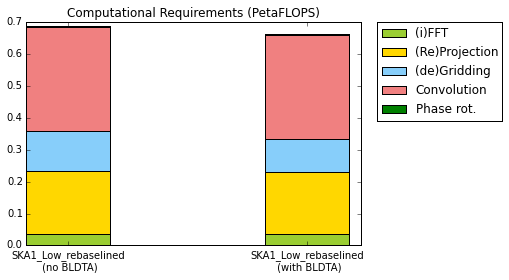

In [2]:
Tel1_BLDTA = False  #baseline dependent time averaging (initial default value, can be toggled interactively)
Tel2_BLDTA = False
interact_manual(iapi.compare_telescopes_default, 
                Telescope_1=available_teles, Telescope_2=available_teles, Band_1=available_bands,
                Band_2=available_bands, Mode_1=available_modes, Mode_2=available_modes,
                Tel1_BLDTA=Tel1_BLDTA, Tel2_BLDTA=Tel2_BLDTA, verbose=verbose_display);

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [3]:
BL_dep_time_av = False  #baseline dependent time averaging (initial default value, can be toggled interactively)
interact(iapi.evaluate_telescope_manual, max_baseline=(10,200), Nf_max = (1,256000,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         Telescope=available_teles, Band=available_bands, Mode=available_modes, BL_dep_time_av=BL_dep_time_av, 
         verbose=verbose_display);

Max Baseline,33 km
Max # of channels,128000
Telescope,SKA1_Low_rebaselined
Band,Low
Mode,Continuum
Tsnap,900.6 sec
Nfacet,5


Visibility Buffer,0.472 PetaBytes
Working (cache) memory,0.18 TeraBytes
Image side length,2758 pixels
I/O Rate,3 TeraBytes/s
Total Compute Requirement,2.49 PetaFLOPS
-> Gridding,0.0713 PetaFLOPS
-> FFT,0.000241 PetaFLOPS
-> Projection,0.00148 PetaFLOPS
-> Convolution,2.4 PetaFLOPS
-> Phase Rotation,0.0114 PetaFLOPS


### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

Max Baseline,73 km
Max # of channels,128000
Telescope,SKA1_Low_rebaselined
Band,Low
Mode,Continuum


Optimal Number of Facets,2
Optimal Snapshot Time,43.9 sec.
Visibility Buffer,1.02 PetaBytes
Working (cache) memory,0.0941 TeraBytes
Image side length,15256 pixels
I/O Rate,1.04 TeraBytes/s
Total Compute Requirement,0.624 PetaFLOPS
-> Gridding,0.111 PetaFLOPS
-> FFT,0.0295 PetaFLOPS
-> Projection,0.17 PetaFLOPS
-> Convolution,0.309 PetaFLOPS


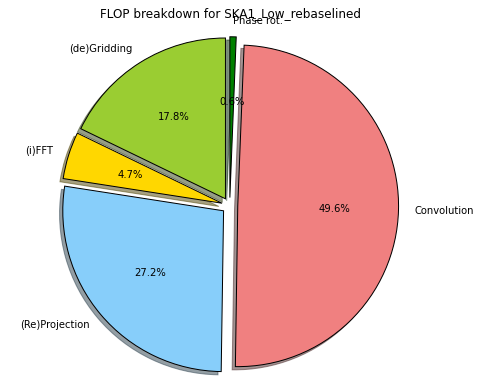

In [4]:
BL_dep_time_av = False  #baseline dependent time averaging (initial default value, can be toggled interactively)
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10,200), Nf_max = (1,256000,1), Telescope=available_teles, 
         Band=available_bands, Mode=available_modes, BL_dep_time_av=BL_dep_time_av, verbose=verbose_display);